In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [5]:
file_path = "water and electricity/Resources.csv"
df_resources = pd.read_csv(file_path)
df_resources.head()

,id,year,country,safe_water_access,elec_gen_kwh,logistics_index
0,1002,2015,United States,96.413268,4091.740206,3.92
1,1002,2016,United States,96.598640,4095.487355,3.99
2,1002,2017,United States,96.782652,4058.260842,3.99
3,1002,2018,United States,96.965188,4207.816619,3.89
4,1002,2019,United States,97.146243,4162.812661,3.89


In [6]:
df_resource=df_resources.set_index('id')

In [8]:
df_resource.head()

,year,country,safe_water_access,elec_gen_kwh,logistics_index
id,,,,,
1002,2015,United States,96.413268,4091.740206,3.92
1002,2016,United States,96.598640,4095.487355,3.99
1002,2017,United States,96.782652,4058.260842,3.99
1002,2018,United States,96.965188,4207.816619,3.89
1002,2019,United States,97.146243,4162.812661,3.89


In [9]:
data = df_resource.drop(columns = 'country')

In [11]:
data.head()

,year,safe_water_access,elec_gen_kwh,logistics_index
id,,,,
1002,2015,96.413268,4091.740206,3.92
1002,2016,96.598640,4095.487355,3.99
1002,2017,96.782652,4058.260842,3.99
1002,2018,96.965188,4207.816619,3.89
1002,2019,97.146243,4162.812661,3.89


In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data)
    inertia.append(km.inertia_)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


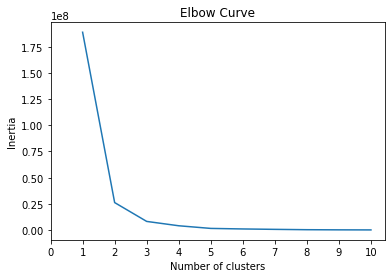

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
# Initialize the K-Means model.

model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(data)

# Predict clusters

predictions = model.predict(data)
print(predictions)

[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
cluster_result=df_resource


cluster_result['class']=predictions

cluster_result.head()

,year,country,safe_water_access,elec_gen_kwh,logistics_index,class
id,,,,,,
1002,2015,United States,96.413268,4091.740206,3.92,0
1002,2016,United States,96.598640,4095.487355,3.99,0
1002,2017,United States,96.782652,4058.260842,3.99,0
1002,2018,United States,96.965188,4207.816619,3.89,0
1002,2019,United States,97.146243,4162.812661,3.89,0


In [30]:
fig = px.scatter_3d(
  cluster_result,
    x="safe_water_access",
    y="elec_gen_kwh",
    z='logistics_index ',
    color="class",
    symbol="country",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()